# **Predicting popularity of a news article based on general sentiment**


---


Silvija Radzevičiūtė (14002833), ZhaoYu Tu (13987496), Gergana Ivanova (14029154)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# **1. Data**

In [ ]:
df = pd.read_csv('OnlineNewsPopularity.csv', sep= ",")

In [ ]:
# removing formating irregularities in the column names
df.columns = df.columns.str.strip()

Based on our selected topic - "Predicting popularity of a news article based 
on general sentiment", we have chosen to work with the Natural Language Processing features.


In [ ]:
# filtering the dataset with parameters needed for our topic
cols = ['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04','global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'shares']
data = df.loc[:, cols]

In [ ]:
data

,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,shares
0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,593
1,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,711
2,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,1500
3,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,1200
4,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,1800
39640,0.029349,0.028575,0.231866,0.681635,0.028575,0.564374,0.194249,0.039634,0.009146,0.812500,0.187500,0.374825,0.136364,0.70,-0.211111,-0.400,-0.100000,1900
39641,0.159004,0.025025,0.025207,0.643794,0.146970,0.510296,0.024609,0.033937,0.024887,0.576923,0.423077,0.307273,0.136364,0.50,-0.356439,-0.800,-0.166667,1900
39642,0.040004,0.040003,0.839987,0.040002,0.040004,0.358578,-0.008066,0.020528,0.023460,0.466667,0.533333,0.236851,0.062500,0.50,-0.205246,-0.500,-0.012500,1100


In [ ]:
data.describe()

,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,3395.380184
std,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,11626.950749
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.025051,0.025012,0.028571,0.028571,0.028574,0.396167,0.057757,0.028384,0.009615,0.600000,0.185185,0.306244,0.050000,0.600000,-0.328383,-0.700000,-0.125000,946.000000
50%,0.033387,0.033345,0.040004,0.040001,0.040727,0.453457,0.119117,0.039023,0.015337,0.710526,0.280000,0.358755,0.100000,0.800000,-0.253333,-0.500000,-0.100000,1400.000000
75%,0.240958,0.150831,0.334218,0.375763,0.399986,0.508333,0.177832,0.050279,0.021739,0.800000,0.384615,0.411428,0.100000,1.000000,-0.186905,-0.300000,-0.050000,2800.000000
max,0.926994,0.925947,0.919999,0.926534,0.927191,1.000000,0.727841,0.155488,0.184932,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,843300.000000


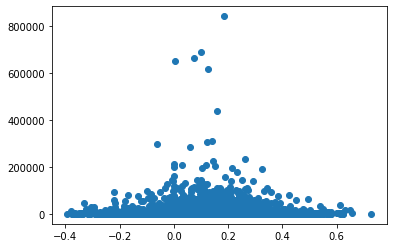

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data['global_sentiment_polarity'], data['shares'])
plt.show()

In [ ]:
# removing the shares parameter before scaling the data
data = data.drop(['shares'], axis=1)

# **2. Data pre-processing**

We scale the data and then we choose binary classification to deem an article as popular/unpopular.

In [ ]:
# scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])

In [ ]:
data

,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity
0,0.539735,0.408532,0.043483,0.044534,0.043273,0.521617,0.433591,0.293670,0.074074,0.769231,0.230769,0.378636,0.100000,0.70,0.650000,0.400,0.800000
1,0.862741,0.054049,0.054453,0.054073,0.053927,0.341246,0.483864,0.277432,0.084822,0.733333,0.266667,0.286915,0.033333,0.70,0.881250,0.875,0.900000
2,0.234945,0.036000,0.036252,0.035977,0.735758,0.702222,0.639345,0.365765,0.051255,0.857143,0.142857,0.495833,0.100000,1.00,0.533333,0.200,0.866667
3,0.030824,0.452833,0.537664,0.031197,0.030815,0.429850,0.440851,0.266460,0.112018,0.666667,0.333333,0.385965,0.136364,0.80,0.630303,0.400,0.833333
4,0.030888,0.031096,0.031060,0.030837,0.954956,0.513502,0.601604,0.479953,0.065575,0.860215,0.139785,0.411127,0.033333,1.00,0.779808,0.500,0.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.027010,0.027000,0.164893,0.026982,0.833982,0.482679,0.477638,0.241641,0.078142,0.722222,0.277778,0.333791,0.100000,0.75,0.740000,0.500,0.875000
39640,0.031660,0.030860,0.252029,0.735683,0.030819,0.564374,0.524255,0.254902,0.049458,0.812500,0.187500,0.374825,0.136364,0.70,0.788889,0.600,0.900000
39641,0.171527,0.027026,0.027399,0.694841,0.158511,0.510296,0.373005,0.218259,0.134573,0.576923,0.423077,0.307273,0.136364,0.50,0.643561,0.200,0.833333
39642,0.043154,0.043203,0.913031,0.043174,0.043145,0.358578,0.343872,0.132022,0.126860,0.466667,0.533333,0.236851,0.062500,0.50,0.794754,0.500,0.987500


In [ ]:
data.describe()

,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,0.199137,0.152553,0.235132,0.241513,0.252407,0.443370,0.457439,0.254842,0.089828,0.682150,0.287934,0.353825,0.095446,0.756728,0.740476,0.478056,0.892500
std,0.283685,0.237279,0.306680,0.318597,0.311892,0.116685,0.086422,0.112090,0.058550,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027023,0.027013,0.031056,0.030837,0.030817,0.396167,0.402560,0.182550,0.051994,0.600000,0.185185,0.306244,0.050000,0.600000,0.671617,0.300000,0.875000
50%,0.036017,0.036012,0.043483,0.043172,0.043926,0.453457,0.457267,0.250970,0.082936,0.710526,0.280000,0.358755,0.100000,0.800000,0.746667,0.500000,0.900000
75%,0.259935,0.162894,0.363281,0.405557,0.431395,0.508333,0.509617,0.323365,0.117552,0.800000,0.384615,0.411428,0.100000,1.000000,0.813095,0.700000,0.950000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# adding back the number of shares
data['shares'] = df['shares']

In [ ]:
# finding Q1, Q3 and the median
data['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f61be3e1cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f61be3e1550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f61be3e1f70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f61be356130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f61be3564c0>],
 'means': []}

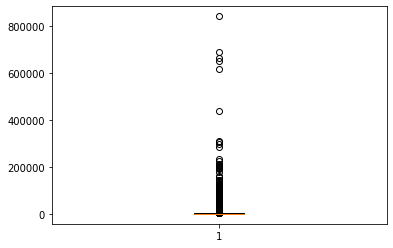

In [ ]:
# creating box plots to check for shares outliers
plt.boxplot(data['shares'])

In [ ]:
# removing outliers using the IQR
from scipy.stats import iqr

iqr = iqr(df['shares'])
upperb = 2800.000000 + 1.5 * iqr
lowerb = 946.000000 - 1.5*iqr

In [ ]:
# removing outliers
data.drop(data[ data['shares'] >= upperb].index, inplace = True)

In [ ]:
data

,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,shares
0,0.539735,0.408532,0.043483,0.044534,0.043273,0.521617,0.433591,0.293670,0.074074,0.769231,0.230769,0.378636,0.100000,0.70,0.650000,0.400,0.800000,593
1,0.862741,0.054049,0.054453,0.054073,0.053927,0.341246,0.483864,0.277432,0.084822,0.733333,0.266667,0.286915,0.033333,0.70,0.881250,0.875,0.900000,711
2,0.234945,0.036000,0.036252,0.035977,0.735758,0.702222,0.639345,0.365765,0.051255,0.857143,0.142857,0.495833,0.100000,1.00,0.533333,0.200,0.866667,1500
3,0.030824,0.452833,0.537664,0.031197,0.030815,0.429850,0.440851,0.266460,0.112018,0.666667,0.333333,0.385965,0.136364,0.80,0.630303,0.400,0.833333,1200
4,0.030888,0.031096,0.031060,0.030837,0.954956,0.513502,0.601604,0.479953,0.065575,0.860215,0.139785,0.411127,0.033333,1.00,0.779808,0.500,0.950000,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.027010,0.027000,0.164893,0.026982,0.833982,0.482679,0.477638,0.241641,0.078142,0.722222,0.277778,0.333791,0.100000,0.75,0.740000,0.500,0.875000,1800
39640,0.031660,0.030860,0.252029,0.735683,0.030819,0.564374,0.524255,0.254902,0.049458,0.812500,0.187500,0.374825,0.136364,0.70,0.788889,0.600,0.900000,1900
39641,0.171527,0.027026,0.027399,0.694841,0.158511,0.510296,0.373005,0.218259,0.134573,0.576923,0.423077,0.307273,0.136364,0.50,0.643561,0.200,0.833333,1900
39642,0.043154,0.043203,0.913031,0.043174,0.043145,0.358578,0.343872,0.132022,0.126860,0.466667,0.533333,0.236851,0.062500,0.50,0.794754,0.500,0.987500,1100


**Binary Classification**

Creating 2 classes: 0 - unpopular and 1 - popular. Using the median (=1400) as the threshold.

In [ ]:
# binary classification 
popularity = pd.cut(data['shares'],bins=[0, 1400, 5500], labels=[0,1])
data['shares_cat'] = popularity
data

,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,shares,shares_cat
0,0.539735,0.408532,0.043483,0.044534,0.043273,0.521617,0.433591,0.293670,0.074074,0.769231,0.230769,0.378636,0.100000,0.70,0.650000,0.400,0.800000,593,0
1,0.862741,0.054049,0.054453,0.054073,0.053927,0.341246,0.483864,0.277432,0.084822,0.733333,0.266667,0.286915,0.033333,0.70,0.881250,0.875,0.900000,711,0
2,0.234945,0.036000,0.036252,0.035977,0.735758,0.702222,0.639345,0.365765,0.051255,0.857143,0.142857,0.495833,0.100000,1.00,0.533333,0.200,0.866667,1500,1
3,0.030824,0.452833,0.537664,0.031197,0.030815,0.429850,0.440851,0.266460,0.112018,0.666667,0.333333,0.385965,0.136364,0.80,0.630303,0.400,0.833333,1200,0
4,0.030888,0.031096,0.031060,0.030837,0.954956,0.513502,0.601604,0.479953,0.065575,0.860215,0.139785,0.411127,0.033333,1.00,0.779808,0.500,0.950000,505,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.027010,0.027000,0.164893,0.026982,0.833982,0.482679,0.477638,0.241641,0.078142,0.722222,0.277778,0.333791,0.100000,0.75,0.740000,0.500,0.875000,1800,1
39640,0.031660,0.030860,0.252029,0.735683,0.030819,0.564374,0.524255,0.254902,0.049458,0.812500,0.187500,0.374825,0.136364,0.70,0.788889,0.600,0.900000,1900,1
39641,0.171527,0.027026,0.027399,0.694841,0.158511,0.510296,0.373005,0.218259,0.134573,0.576923,0.423077,0.307273,0.136364,0.50,0.643561,0.200,0.833333,1900,1
39642,0.043154,0.043203,0.913031,0.043174,0.043145,0.358578,0.343872,0.132022,0.126860,0.466667,0.533333,0.236851,0.062500,0.50,0.794754,0.500,0.987500,1100,0


# **3. Models**

In [ ]:
# splitting into test and train set
data1 = data.drop(['shares', "shares_cat"], axis =1)
X = data1.to_numpy()
y = data['shares_cat'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 0)

**LinearSVC**

In [ ]:
# linearsvc
from sklearn.svm import LinearSVC

parameters = {'C': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(LinearSVC(max_iter=1000), parameters, cv=5)  # using GridSeatchCV to find the best value for C
grid.fit(X_train, y_train)

print(grid.best_estimator_)

best_model = grid.best_estimator_  
linearsvc = best_model.fit(X_train, y_train)  # fitting LinearSVC with the best found C
      
print("Training set score: {:.2f}".format(linearsvc.score(X_train, y_train)))
print("Test set score: {:.2f}".format(linearsvc.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(linearsvc.coef_!=0)))

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

LinearSVC(C=10)
Training set score: 0.60
Test set score: 0.60
Number of features used: 17


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
y_pred_svc = linearsvc.predict(X_test)

print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, y_pred_svc)))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred_svc)))
print(classification_report(y_test, y_pred_svc))

Confusion matrix:
[[3827 1191]
 [2353 1405]]
Accuracy: 0.5961713764813127
              precision    recall  f1-score   support

           0       0.62      0.76      0.68      5018
           1       0.54      0.37      0.44      3758

    accuracy                           0.60      8776
   macro avg       0.58      0.57      0.56      8776
weighted avg       0.59      0.60      0.58      8776



Feature 1 LDA_00: Score 0.2357037600801462
Feature 2 LDA_01: Score -0.330522533134752
Feature 3 LDA_02: Score -0.2866326497647188
Feature 4 LDA_03: Score 0.021816745766707748
Feature 5 LDA_04: Score 0.26305697236189407
Feature 6 global_subjectivity: Score 0.8212623462178955
Feature 7 global_sentiment_polarity: Score 0.008564094808432761
Feature 8 global_rate_positive_words: Score 0.03042993506738442
Feature 9 global_rate_negative_words: Score -0.024071216590564926
Feature 10 rate_positive_words: Score -0.5214746651411385
Feature 11 rate_negative_words: Score -0.6185181881596089
Feature 12 avg_positive_polarity: Score -0.013198006599201551
Feature 13 min_positive_polarity: Score -0.29492565810428134
Feature 14 max_positive_polarity: Score 0.09059416523547294
Feature 15 avg_negative_polarity: Score 0.1990798662080044
Feature 16 min_negative_polarity: Score -0.09211215871546273
Feature 17 max_negative_polarity: Score -0.03511032262344591


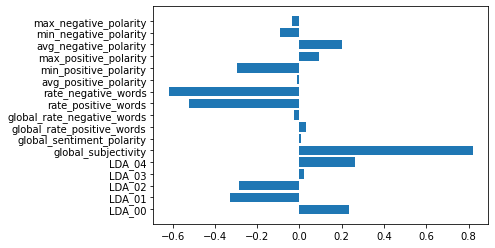

In [ ]:
# Feature importance based on LinearSVC
importance = best_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature {} {}: Score {}'.format(i+1,data1.columns[i],v))
  
# plot feature importance
plt.barh([x for x in range(len(importance))], importance)
plt.yticks(range(17), data[:].keys())
plt.show()

**KNeighborsClassifier**

In [ ]:
# KNeighbors
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': range(1, 31)}
knn = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
knn.fit(X_train, y_train)

print(knn.best_estimator_)   # selecting the best parameter from the 1-30 range

best_model = knn.best_estimator_  
knn_fit = best_model.fit(X_train, y_train) # using the best parameter to fit the model and get the optimal result
      
print("Training set score: {:.2f}".format(knn_fit.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn_fit.score(X_test, y_test)))

KNeighborsClassifier(n_neighbors=24)
Training set score: 0.64
Test set score: 0.60


In [ ]:
y_pred_knn = knn_fit.predict(X_test)

print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, y_pred_knn)))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred_knn)))
print(classification_report(y_test, y_pred_knn))

Confusion matrix:
[[3915 1103]
 [2413 1345]]
Accuracy: 0.5993618960802187
              precision    recall  f1-score   support

           0       0.62      0.78      0.69      5018
           1       0.55      0.36      0.43      3758

    accuracy                           0.60      8776
   macro avg       0.58      0.57      0.56      8776
weighted avg       0.59      0.60      0.58      8776



**LogisticRegression**

In [ ]:
# Linear Regression
parameters = {'C': [0.1, 1, 10, 100, 1000]}
# Using GridSearchCV to find the best value for parameter C
grid = GridSearchCV(LogisticRegression(penalty='l2', max_iter=1000, multi_class="ovr"), parameters, cv=5) 
grid.fit(X_train, y_train)

print(grid.best_estimator_)

best_model = grid.best_estimator_
logreg = best_model.fit(X_train, y_train) # fitting the model to see it's performance
      
print("Training test score: {:.2f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(logreg.coef_!=0)))

LogisticRegression(C=0.1, max_iter=1000, multi_class='ovr')
Training test score: 0.60
Test set score: 0.60
Number of features used: 17


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred_logreg = logreg.predict(X_test)

print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, y_pred_logreg)))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred_logreg)))
print(classification_report(y_test, y_pred_logreg))

Confusion matrix:
[[3886 1132]
 [2418 1340]]
Accuracy: 0.5954876937101186
              precision    recall  f1-score   support

           0       0.62      0.77      0.69      5018
           1       0.54      0.36      0.43      3758

    accuracy                           0.60      8776
   macro avg       0.58      0.57      0.56      8776
weighted avg       0.58      0.60      0.58      8776



In [ ]:
# finding the importance of each parameter when classifying an article as popular/unpopular
best_model.coef_

array([[ 0.51639979, -0.64324642, -0.58709697,  0.12347607,  0.58379474,
         1.19641584,  0.20518393,  0.09694983, -0.04138859, -0.78233305,
        -0.97006571, -0.10291301, -0.45412825,  0.17307927,  0.18220771,
        -0.1589346 ,  0.08463623]])

Feature 1 LDA_00: Score 0.5163997861700319
Feature 2 LDA_01: Score -0.6432464223795874
Feature 3 LDA_02: Score -0.5870969656830084
Feature 4 LDA_03: Score 0.12347606864493961
Feature 5 LDA_04: Score 0.5837947396383745
Feature 6 global_subjectivity: Score 1.1964158387285033
Feature 7 global_sentiment_polarity: Score 0.20518392749819223
Feature 8 global_rate_positive_words: Score 0.09694983347660169
Feature 9 global_rate_negative_words: Score -0.041388593175259836
Feature 10 rate_positive_words: Score -0.7823330549986625
Feature 11 rate_negative_words: Score -0.9700657082597833
Feature 12 avg_positive_polarity: Score -0.10291301330249017
Feature 13 min_positive_polarity: Score -0.45412824537910584
Feature 14 max_positive_polarity: Score 0.173079268807982
Feature 15 avg_negative_polarity: Score 0.1822077089560686
Feature 16 min_negative_polarity: Score -0.15893460447496371
Feature 17 max_negative_polarity: Score 0.0846362291464126


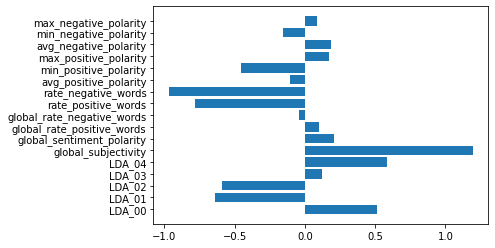

In [ ]:
importance = best_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature {} {}: Score {}'.format(i+1,data1.columns[i],v))
  
# plot feature importance
plt.barh([x for x in range(len(importance))], importance)
plt.yticks(range(17), data[:].keys())
plt.show()

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# random forest classifier
forest = RandomForestClassifier(n_estimators=1000, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.610


We would like to see if the result will improve after hypertuning the parameters for Random Forest Classifier. After a few tries running the code (in other notebooks) we established the best parameters to use for Random Forest Classifier. We use them directly here as running the numerous possible combinations is a timely process. The best parameters are: n_estimators = 1000, max_depth = 10, max_features = 10. 

In [ ]:
# RandomForestClassifier with the hypertuned parameters
forest1 = RandomForestClassifier(n_estimators=1000, max_depth=10, max_features = 10, random_state=0)
forest1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest1.score(X_test, y_test)))

Accuracy on training set: 0.749
Accuracy on test set: 0.608


In [ ]:
y_pred_tree = forest1.predict(X_test)

print(classification_report(y_test, y_pred_tree))
print("Accuracy score: ", accuracy_score(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.63      0.78      0.69      5018
           1       0.56      0.38      0.46      3758

    accuracy                           0.61      8776
   macro avg       0.59      0.58      0.57      8776
weighted avg       0.60      0.61      0.59      8776

Accuracy score:  0.6083637192342753


Feature 1 LDA_00: Score 0.5163997861700319
Feature 2 LDA_01: Score -0.6432464223795874
Feature 3 LDA_02: Score -0.5870969656830084
Feature 4 LDA_03: Score 0.12347606864493961
Feature 5 LDA_04: Score 0.5837947396383745
Feature 6 global_subjectivity: Score 1.1964158387285033
Feature 7 global_sentiment_polarity: Score 0.20518392749819223
Feature 8 global_rate_positive_words: Score 0.09694983347660169
Feature 9 global_rate_negative_words: Score -0.041388593175259836
Feature 10 rate_positive_words: Score -0.7823330549986625
Feature 11 rate_negative_words: Score -0.9700657082597833
Feature 12 avg_positive_polarity: Score -0.10291301330249017
Feature 13 min_positive_polarity: Score -0.45412824537910584
Feature 14 max_positive_polarity: Score 0.173079268807982
Feature 15 avg_negative_polarity: Score 0.1822077089560686
Feature 16 min_negative_polarity: Score -0.15893460447496371
Feature 17 max_negative_polarity: Score 0.0846362291464126


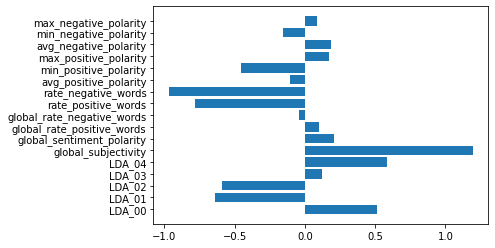

In [ ]:
# Feature importance based on Random Forest
importance = best_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature {} {}: Score {}'.format(i+1,data1.columns[i],v))
  
# plot feature importance
plt.barh([x for x in range(len(importance))], importance)
plt.yticks(range(17), data[:].keys())
plt.show()

# **Model Comparisson**

In [64]:
# The F1 score is defined as the harmonic mean of precision and recall.
# Comparing the F1 score between models
from sklearn.metrics import f1_score

print("f1_score of random forest: {:.3f}".format(f1_score(y_test, forest1.predict(X_test))))

print("f1_score of LogReg: {:.3f}".format(f1_score(y_test, logreg.predict(X_test))))
print("f1_score of KNN: {:.3f}".format(f1_score(y_test, knn_fit.predict(X_test))))
print("f1_score of LinearSVC: {:.3f}".format(f1_score(y_test, linearsvc.predict(X_test))))

f1_score of random forest: 0.456
f1_score of LogReg: 0.430
f1_score of KNN: 0.433
f1_score of LinearSVC: 0.442


In [65]:
# Average precision: the quality of a positive prediction made by the model.
# Comparing average precision between models
from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(y_test, forest1.predict_proba(X_test)[:, 1])
ap_logreg = average_precision_score(y_test, logreg.decision_function(X_test))
ap_knn = average_precision_score(y_test, knn_fit.predict(X_test))
ap_linearsvc = average_precision_score(y_test, linearsvc.predict(X_test))

print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of LogReg: {:.3f}".format(ap_logreg))
print("Average precision of KNN: {:.3f}".format(ap_knn))
print("Average precision of LinearSVC: {:.3f}".format(ap_linearsvc))

Average precision of random forest: 0.553
Average precision of LogReg: 0.516
Average precision of KNN: 0.472
Average precision of LinearSVC: 0.470


KNN: f1=0.433 auc=0.528
Logistic Regression: f1=0.430 auc=0.516
Random Forest: f1=0.456 auc=0.552


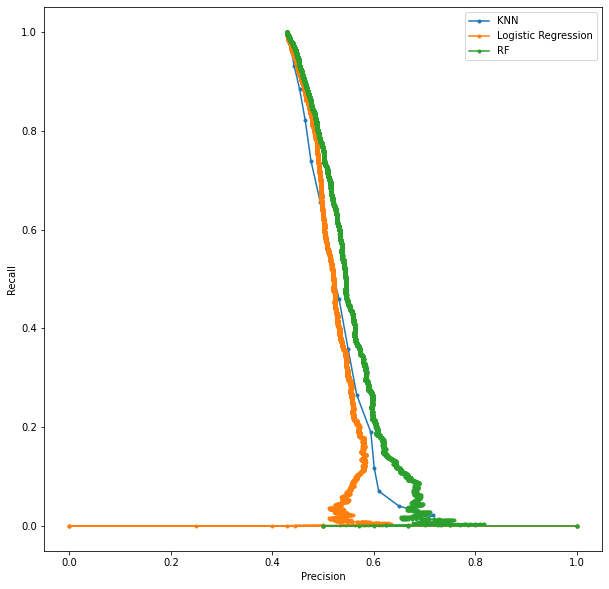

In [66]:
# Recall Precision curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10)

knn_probs = knn_fit.predict_proba(X_test)
logreg_probs = logreg.predict_proba(X_test)
rf_probs = forest1.predict_proba(X_test)

# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]
logreg_probs = logreg_probs[:, 1]
rf_probs = rf_probs[:, 1]

# predict class values
yhat = knn_fit.predict(X_test)

knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs)
knn_f1, knn_auc = f1_score(y_test, yhat), auc(knn_recall, knn_precision)

yhat1 = logreg.predict(X_test)

logreg_precision, logreg_recall, _ = precision_recall_curve(y_test, logreg_probs)
logreg_f1, logreg_auc = f1_score(y_test, yhat1), auc(logreg_recall, logreg_precision)

yhat2 = forest1.predict(X_test)

rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
rf_f1, rf_auc = f1_score(y_test, yhat2), auc(rf_recall, rf_precision)

# summarize scores
print('KNN: f1=%.3f auc=%.3f' % (knn_f1, knn_auc))
print('Logistic Regression: f1=%.3f auc=%.3f' % (logreg_f1, logreg_auc))
print('Random Forest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))

# plot the precision-recall curves

pyplot.plot(knn_precision, knn_recall, marker='.', label='KNN')
pyplot.plot(logreg_precision, logreg_recall, marker='.', label='Logistic Regression')
pyplot.plot(rf_precision, rf_recall, marker='.', label='RF')

pyplot.xlabel('Precision')
pyplot.ylabel('Recall')

pyplot.legend()

pyplot.show()

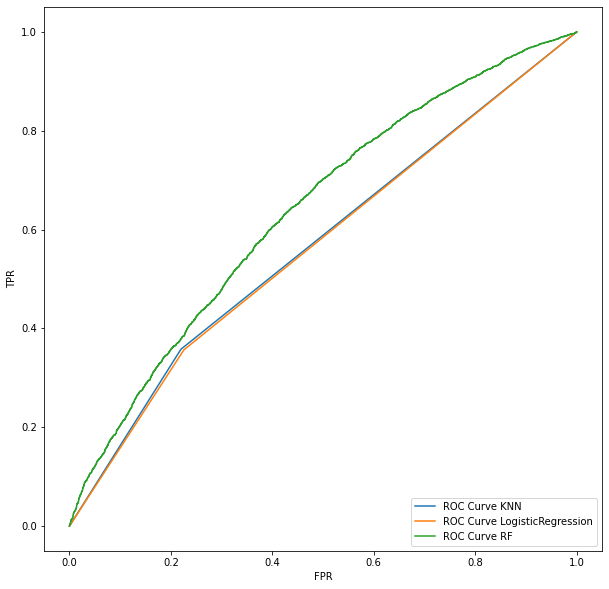

In [67]:
# ROC curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10)

fpr, tpr, thresholds = roc_curve(y_test, knn_fit.predict(X_test))
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, logreg.predict(X_test))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, forest1.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve KNN")
plt.plot(fpr_logreg, tpr_logreg, label="ROC Curve LogisticRegression")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR")

plt.legend(loc=4)